In [8]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tqdm import tqdm

In [41]:
ds = xr.open_dataset('../turbulent_SW/combined_output_freq_c_3.nc',decode_times=False)

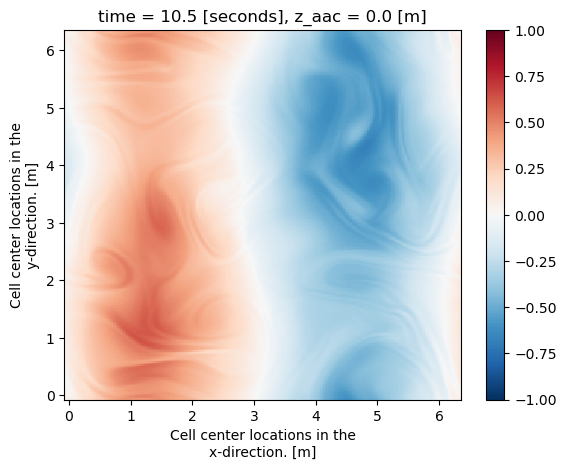

In [45]:
(ds.ω - ds.ω_filtered)[105,0,:,:].plot(vmin=-1, vmax=1, cmap='RdBu_r')

In [10]:
def get_weight_function(t,tstar,N,freq_c):
    
    N_coeffs = 2**(N-1)
    G = np.zeros_like(t)
    for i in range(1,N_coeffs+1):
        
        a = (freq_c/2**N)*np.sin(np.pi/(2**(N+1))*(2*i-1))
        b = (freq_c/2**N)*np.cos(np.pi/(2**(N+1))*(2*i-1))
        c = freq_c*np.sin(np.pi/(2**(N+1))*(2*i-1))
        d = freq_c*np.cos(np.pi/(2**(N+1))*(2*i-1))

        G += (a*np.cos(d*np.abs(t-tstar)) + b*np.sin(d*np.abs(t-tstar)))*np.exp(-c*np.abs(t-tstar))


    return G

for varname in ["ω","T"]:
    ds[varname+"_Eulerian_filtered"] = ds.ω_filtered.copy(data = 0*ds.ω_filtered.data)
    for it in tqdm(range(0,ds.ω_filtered.shape[0])):
        ds[varname+"_Eulerian_filtered"][it,:,:,:] = (ds[varname]*get_weight_function(ds.time,ds.time[it],N=2,freq_c=1)).sum(axis=0)*(ds.time[1] - ds.time[0])

100%|██████████| 401/401 [02:10<00:00,  3.07it/s]


<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_380596/3841942059.py:16: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']
/tmp/ipykernel_380596/3841942059.py:16: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']
/tmp/ipykernel_380596/3841942059.py:19: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']
/tmp/ipykernel_380596/3841942059.py:19: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']


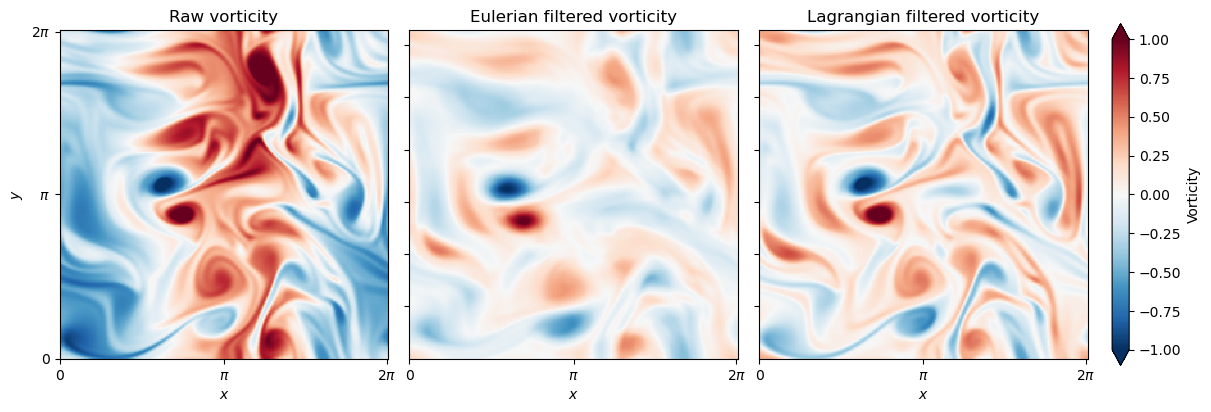

In [32]:
fig, ax = plt.subplots(1,3,figsize=(12,4),constrained_layout = True)
ds.ω[200,0,3:-3,3:-3].plot(ax=ax[0],vmin=-1,vmax=1,cmap='RdBu_r',add_colorbar=False)
ds.ω_Eulerian_filtered[200,0,3:-3,3:-3].plot(ax=ax[1],vmin=-1,vmax=1,cmap='RdBu_r',add_colorbar=False)
ds.ω_filtered[200,0,3:-3,3:-3].plot(ax=ax[2],vmin=-1,vmax=1,cmap='RdBu_r',cbar_kwargs={'label':'Vorticity'},add_colorbar=True)
[ax[i].set_aspect('equal') for i in range(3)]
ax[0].set_title("Raw vorticity")
ax[1].set_title("Eulerian filtered vorticity")
ax[2].set_title("Lagrangian filtered vorticity")
[ax[i].set_xlabel("$x$") for i in range(3)];
ax[0].set_ylabel("$y$")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])  
[ax[i].set_xticks([0,np.pi,2*np.pi-0.03]) for i in range(3)]
labels = ['0','$\pi$','$2\pi$']
[ax[i].set_xticklabels(labels) for i in range(3)]
ax[0].set_yticks([0,np.pi,2*np.pi-0.03])
labels = ['0','$\pi$','$2\pi$']
ax[0].set_yticklabels(labels)
fig.savefig('vorticity_filtering.png',dpi=300)

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_380596/3947836356.py:20: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']
/tmp/ipykernel_380596/3947836356.py:20: SyntaxWarning: invalid escape sequence '\p'
  labels = ['0','$\pi$','$2\pi$']


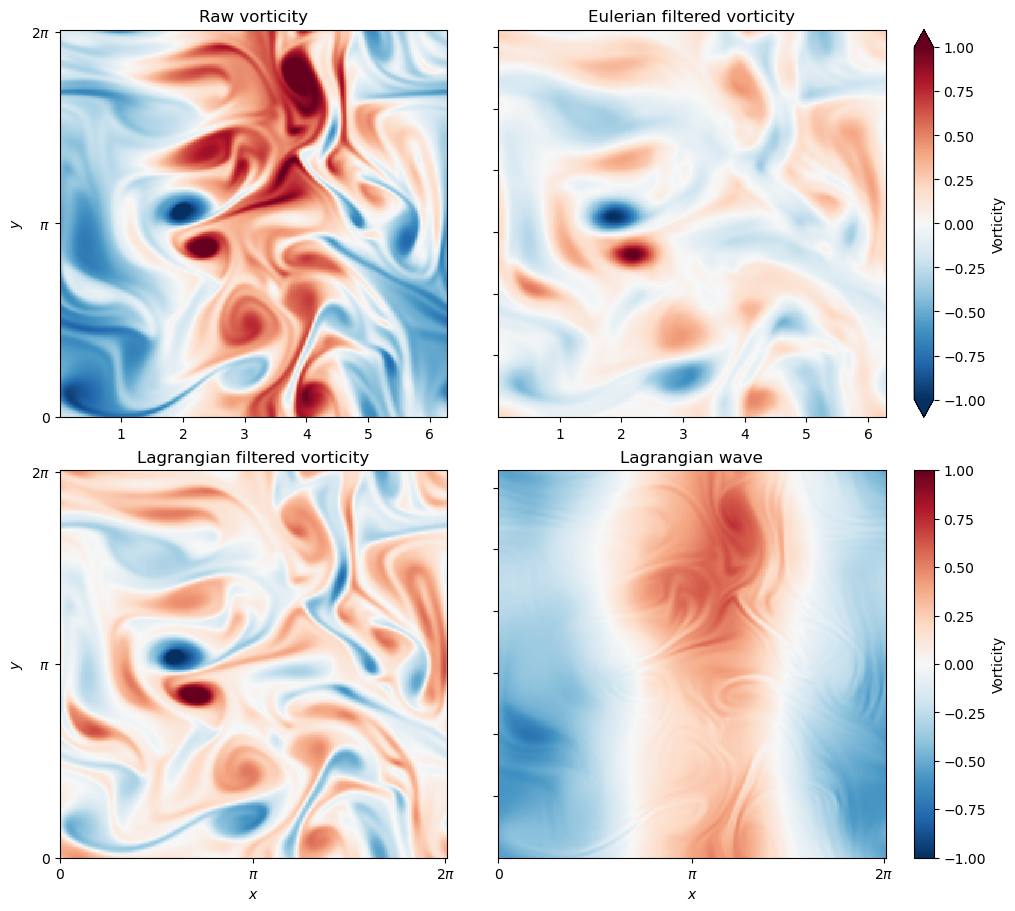

In [40]:
fig, ax = plt.subplots(2,2,figsize=(10,9),constrained_layout = True)
ds.ω[200,0,3:-3,3:-3].plot(ax=ax[0,0],vmin=-1,vmax=1,cmap='RdBu_r',add_colorbar=False)
ds.ω_Eulerian_filtered[200,0,3:-3,3:-3].plot(ax=ax[0,1],vmin=-1,vmax=1,cmap='RdBu_r',cbar_kwargs={'label':'Vorticity'},add_colorbar=True)
ds.ω_filtered_regrid[200,0,3:-3,3:-3].plot(ax=ax[1,0],vmin=-1,vmax=1,cmap='RdBu_r',add_colorbar=False)
(ds.ω - ds.ω_filtered)[200,0,3:-3,3:-3].plot(ax=ax[1,1],vmin=-1,vmax=1,cmap='RdBu_r',cbar_kwargs={'label':'Vorticity'},add_colorbar=True)

[ax[i,j].set_aspect('equal') for i in range(2) for j in range(2)]
ax[0,0].set_title("Raw vorticity")
ax[0,1].set_title("Eulerian filtered vorticity")
ax[1,0].set_title("Lagrangian filtered vorticity")
ax[1,1].set_title("Lagrangian wave")
[ax[1,j].set_xlabel("$x$") for j in range(2)];
[ax[0,j].set_xlabel("") for j in range(2)];
[ax[i,0].set_ylabel("$y$") for i in range(2)]
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])  
[ax[1,j].set_xticks([0,np.pi,2*np.pi-0.03]) for j in range(2)]
labels = ['0','$\pi$','$2\pi$']
[ax[1,j].set_xticklabels(labels) for j in range(2)]
[ax[i,0].set_yticks([0,np.pi,2*np.pi-0.03]) for i in range(2)]
[ax[i,0].set_yticklabels(labels) for i in range(2)]
fig.savefig('vorticity_filtering.png',dpi=300)